In [1]:
# loading libraries

import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [2]:
import io
import urllib.request
from base64 import b64encode

import chart_studio.tools as tls
import dash
from dash import html
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
from dash import dcc
from dash.dependencies import Input, Output

In [3]:
# Display all df columns
pd.set_option("display.max_columns", None)

# Set up with a higher resolution screen
%config InlineBackend.figure_format = 'retina'

- Dataset with flights with same original and destination State

In [4]:
selected_columns = ['icao_origin', 'dep_city', 'dep_state', 'route_icao', 'lat_dd_origin', 'long_dd_origin']

In [5]:
df_same_state = pd.read_csv('./assets/csv/df_all_years/same_state.csv', sep=',', usecols=selected_columns)

In [6]:
len(df_same_state)

889984

In [7]:
same_state_map = df_same_state.groupby('icao_origin').agg(
    dep_city=('dep_city', lambda x: x.unique()),
    dep_state=('dep_state', lambda x: x.unique()),
    lat_dd_origin=('lat_dd_origin', lambda x: x.unique()),
    long_dd_origin=('long_dd_origin', lambda x: x.unique())
).reset_index()

In [8]:
same_state_map

,icao_origin,dep_city,dep_state,lat_dd_origin,long_dd_origin
0,SBAA,Conceição Do Araguaia,PA,-8.3486,-49.3031
1,SBAC,Aracati,CE,-4.5686,-37.8047
2,SBAE,Arealva,SP,-22.1578,-49.0683
3,SBAQ,Araraquara,SP,-21.8044,-48.1403
4,SBAT,Alta Floresta,MT,-9.8664,-56.1050
...,...,...,...,...,...
211,SWRD,Rondonópolis,MT,-16.5881,-54.7217
212,SWSI,Sinop,MT,-11.8850,-55.5861
213,SWTP,Santa Isabel Do Rio Negro,AM,-0.4169,-65.0339
214,SWTS,Tangará Da Serra,MT,-14.6619,-57.4439


In [9]:
airports_capitals = [
    'SBAR', 'SBBE', 'SBBR', 'SBBV', 'SBCF', 'SBCG', 'SBCT', 'SBCY',
    'SBEG', 'SBFL', 'SBFZ', 'SBGL', 'SBGO', 'SBGR', 'SBJP', 'SBKP',
    'SBMO', 'SBMQ', 'SBPA', 'SBPJ', 'SBPM', 'SBPV', 'SBRB', 'SBRF',
    'SBRJ', 'SBSG', 'SBSL', 'SBSP', 'SBSV', 'SBTE', 'SBVT'
]

In [10]:
same_state_map = same_state_map[
    (same_state_map["icao_origin"].isin(airports_capitals) == False)
]

In [11]:
same_state_map

,icao_origin,dep_city,dep_state,lat_dd_origin,long_dd_origin
0,SBAA,Conceição Do Araguaia,PA,-8.3486,-49.3031
1,SBAC,Aracati,CE,-4.5686,-37.8047
2,SBAE,Arealva,SP,-22.1578,-49.0683
3,SBAQ,Araraquara,SP,-21.8044,-48.1403
4,SBAT,Alta Floresta,MT,-9.8664,-56.1050
...,...,...,...,...,...
211,SWRD,Rondonópolis,MT,-16.5881,-54.7217
212,SWSI,Sinop,MT,-11.8850,-55.5861
213,SWTP,Santa Isabel Do Rio Negro,AM,-0.4169,-65.0339
214,SWTS,Tangará Da Serra,MT,-14.6619,-57.4439


In [12]:
map = folium.Map(location=[-15, -55], tiles="cartodbpositron", zoom_start=4)

m = folium.map.FeatureGroup()

for lat, lng, dep_city, dep_state, icao_origin in zip(
    same_state_map["lat_dd_origin"],
    same_state_map["long_dd_origin"],
    same_state_map["dep_city"],
    same_state_map["dep_state"],
    same_state_map["icao_origin"],
):
    m.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5,
            color="blue",
            fill=True,
            fill_color="white",
            fill_opacity=0.7,
            tooltip=str(dep_city) + ", " + str(dep_state),
        )
    )

map.add_child(m)

# map.save("./presentation/maps/map_same_state.html")

map

- Dataset with flights with different original and destination state

In [13]:
selected_columns = ['icao_origin', 'dep_city', 'dep_state', 'icao_dest', 'lat_dd_origin', 'long_dd_origin']

In [14]:
df_different_state = pd.read_csv('./assets/csv/df_all_years/different_state.csv', sep=',', usecols=selected_columns)

In [15]:
df_different_state.head(2)

,icao_origin,dep_city,dep_state,icao_dest,lat_dd_origin,long_dd_origin
0,SBCT,São José Dos Pinhais,PR,SBSP,-25.5317,-49.1761
1,SBCT,São José Dos Pinhais,PR,SBSP,-25.5317,-49.1761


In [16]:
len(df_different_state)

7861699

In [17]:
different_state_reg = df_different_state[
    (df_different_state["icao_origin"].isin(airports_capitals) == False)
]

In [18]:
len(different_state_reg)

614370

In [19]:
different_state_reg = different_state_reg[
    (different_state_reg["icao_dest"].isin(airports_capitals) == False)
]

In [20]:
len(different_state_reg)

33292

In [21]:
different_state_map = different_state_reg.groupby('icao_origin').agg(
    dep_city=('dep_city', lambda x: x.unique()),
    dep_state=('dep_state', lambda x: x.unique()),
    lat_dd_origin=('lat_dd_origin', lambda x: x.unique()),
    long_dd_origin=('long_dd_origin', lambda x: x.unique())
).reset_index()

In [22]:
different_state_map

,icao_origin,dep_city,dep_state,lat_dd_origin,long_dd_origin
0,SBAA,Conceição Do Araguaia,PA,-8.3486,-49.3031
1,SBAE,Arealva,SP,-22.1578,-49.0683
2,SBAU,Araçatuba,SP,-21.1442,-50.4264
3,SBBH,Belo Horizonte,MG,-19.8519,-43.9506
4,SBCA,Cascavel,PR,-25.0022,-53.5019
...,...,...,...,...,...
61,SWGN,Araguaína,TO,-7.2283,-48.2408
62,SWIQ,Minaçu,GO,-13.5506,-48.2006
63,SWLC,Rio Verde,GO,-17.8347,-50.9561
64,SWPI,Parintins,AM,-2.6694,-56.7711


In [23]:
map = folium.Map(location=[-15, -55], tiles="cartodbpositron", zoom_start=4)

m = folium.map.FeatureGroup()

for lat, lng, dep_city, dep_state, icao_origin in zip(
    different_state_map["lat_dd_origin"],
    different_state_map["long_dd_origin"],
    different_state_map["dep_city"],
    different_state_map["dep_state"],
    different_state_map["icao_origin"],
):
    m.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5,
            color="red",
            fill=True,
            fill_color="white",
            fill_opacity=0.7,
            tooltip=str(dep_city) + ", " + str(dep_state),
        )
    )

map.add_child(m)

# map.save("./presentation/maps/map_different_state.html")

map

In [24]:
unique_regional_airports = pd.merge(same_state_map, different_state_map, on='icao_origin', how='outer')

In [25]:
unique_regional_airports

,icao_origin,dep_city_x,dep_state_x,lat_dd_origin_x,long_dd_origin_x,dep_city_y,dep_state_y,lat_dd_origin_y,long_dd_origin_y
0,SBAA,Conceição Do Araguaia,PA,-8.3486,-49.3031,Conceição Do Araguaia,PA,-8.3486,-49.3031
1,SBAC,Aracati,CE,-4.5686,-37.8047,NaN,NaN,NaN,NaN
2,SBAE,Arealva,SP,-22.1578,-49.0683,Arealva,SP,-22.1578,-49.0683
3,SBAQ,Araraquara,SP,-21.8044,-48.1403,NaN,NaN,NaN,NaN
4,SBAT,Alta Floresta,MT,-9.8664,-56.1050,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
190,SWVC,Vila Rica,MT,-9.9811,-51.1406,NaN,NaN,NaN,NaN
191,SBCI,NaN,NaN,NaN,NaN,Carolina,MA,-7.3206,-47.4586
192,SNAT,NaN,NaN,NaN,NaN,Aracati,CE,-4.5686,-37.8047
193,SNRJ,NaN,NaN,NaN,NaN,Brejo,MA,-2.1867,-56.0903


In [26]:
unique_regional_airports.tail(10)

,icao_origin,dep_city_x,dep_state_x,lat_dd_origin_x,long_dd_origin_x,dep_city_y,dep_state_y,lat_dd_origin_y,long_dd_origin_y
185,SWPY,Primavera Do Leste,MT,-15.5656,-54.3378,NaN,NaN,NaN,NaN
186,SWRD,Rondonópolis,MT,-16.5881,-54.7217,Rondonópolis,MT,-16.5881,-54.7217
187,SWSI,Sinop,MT,-11.8850,-55.5861,NaN,NaN,NaN,NaN
188,SWTP,Santa Isabel Do Rio Negro,AM,-0.4169,-65.0339,NaN,NaN,NaN,NaN
189,SWTS,Tangará Da Serra,MT,-14.6619,-57.4439,NaN,NaN,NaN,NaN
190,SWVC,Vila Rica,MT,-9.9811,-51.1406,NaN,NaN,NaN,NaN
191,SBCI,NaN,NaN,NaN,NaN,Carolina,MA,-7.3206,-47.4586
192,SNAT,NaN,NaN,NaN,NaN,Aracati,CE,-4.5686,-37.8047
193,SNRJ,NaN,NaN,NaN,NaN,Brejo,MA,-2.1867,-56.0903
194,SWIQ,NaN,NaN,NaN,NaN,Minaçu,GO,-13.5506,-48.2006


In [27]:
left_190_airport_codes = [
    'SBAA', 'SBAC', 'SBAE', 'SBAQ', 'SBAT', 'SBAU', 'SBAX', 'SBBG',
    'SBBH', 'SBBT', 'SBBW', 'SBCA', 'SBCB', 'SBCD', 'SBCH', 'SBCJ',
    'SBCM', 'SBCN', 'SBCP', 'SBCR', 'SBCX', 'SBCZ', 'SBDB', 'SBDN',
    'SBDO', 'SBFE', 'SBFI', 'SBFN', 'SBGV', 'SBHT', 'SBIH', 'SBIL',
    'SBIP', 'SBIZ', 'SBJA', 'SBJD', 'SBJE', 'SBJF', 'SBJI', 'SBJU',
    'SBJV', 'SBKG', 'SBLE', 'SBLJ', 'SBLO', 'SBMA', 'SBMD', 'SBME',
    'SBMG', 'SBMH', 'SBMK', 'SBML', 'SBMS', 'SBMY', 'SBNF', 'SBNM',
    'SBNT', 'SBPB', 'SBPC', 'SBPF', 'SBPG', 'SBPK', 'SBPL', 'SBPO',
    'SBPS', 'SBQV', 'SBRD', 'SBRP', 'SBSI', 'SBSJ', 'SBSM', 'SBSN',
    'SBSO', 'SBSR', 'SBTB', 'SBTC', 'SBTD', 'SBTF', 'SBTG', 'SBTT',
    'SBTU', 'SBUA', 'SBUF', 'SBUG', 'SBUL', 'SBUR', 'SBUY', 'SBVC',
    'SBVG', 'SBVH', 'SBZM', 'SDAG', 'SDAM', 'SDCG', 'SDIM', 'SDNM',
    'SDOW', 'SDSC', 'SDTK', 'SDUB', 'SDWQ', 'SDZG', 'SILC', 'SIMK',
    'SIZX', 'SJHG', 'SJRG', 'SJTC', 'SNAR', 'SNBA', 'SNBR', 'SNCT',
    'SNDC', 'SNDM', 'SNDT', 'SNEE', 'SNGX', 'SNHS', 'SNIG', 'SNJD',
    'SNJM', 'SNJR', 'SNMA', 'SNMZ', 'SNNU', 'SNOB', 'SNOS', 'SNOX',
    'SNPD', 'SNPJ', 'SNRU', 'SNTF', 'SNTI', 'SNTO', 'SNUH', 'SNUI',
    'SNVB', 'SNVC', 'SNVS', 'SNWS', 'SNYA', 'SNZA', 'SNZR', 'SSCK',
    'SSCN', 'SSCP', 'SSCT', 'SSDO', 'SSER', 'SSFB', 'SSJA', 'SSKM',
    'SSKW', 'SSLT', 'SSOE', 'SSOG', 'SSOU', 'SSPG', 'SSPI', 'SSSB',
    'SSSC', 'SSTE', 'SSUM', 'SSUV', 'SSVL', 'SSZR', 'SWBC', 'SWBE',
    'SWBG', 'SWCA', 'SWEI', 'SWEK', 'SWFX', 'SWGI', 'SWGN', 'SWHP',
    'SWHT', 'SWJN', 'SWKO', 'SWLB', 'SWLC', 'SWMW', 'SWOB', 'SWPI',
    'SWPY', 'SWRD', 'SWSI', 'SWTP', 'SWTS', 'SWVC', 'SBCI', 'SNAT',
    'SNRJ', 'SWIQ'
]

In [28]:
right_4_airport_codes = ['SBCI', 'SNAT', 'SNRJ', 'SWIQ']

In [29]:
# map

In [30]:
df1 = same_state_map.set_index('icao_origin')
df2 = different_state_map.set_index('icao_origin')

In [31]:
df_regional_map = df1.combine_first(df2).reset_index()

In [32]:
df_regional_map.icao_origin.unique()

array(['SBAA', 'SBAC', 'SBAE', 'SBAQ', 'SBAT', 'SBAU', 'SBAX', 'SBBG',
       'SBBH', 'SBBT', 'SBBW', 'SBCA', 'SBCB', 'SBCD', 'SBCH', 'SBCI',
       'SBCJ', 'SBCM', 'SBCN', 'SBCP', 'SBCR', 'SBCX', 'SBCZ', 'SBDB',
       'SBDN', 'SBDO', 'SBFE', 'SBFI', 'SBFN', 'SBGV', 'SBHT', 'SBIH',
       'SBIL', 'SBIP', 'SBIZ', 'SBJA', 'SBJC', 'SBJD', 'SBJE', 'SBJF',
       'SBJI', 'SBJU', 'SBJV', 'SBKG', 'SBLE', 'SBLJ', 'SBLO', 'SBMA',
       'SBMD', 'SBME', 'SBMG', 'SBMH', 'SBMK', 'SBML', 'SBMS', 'SBMY',
       'SBNF', 'SBNM', 'SBNT', 'SBPB', 'SBPC', 'SBPF', 'SBPG', 'SBPK',
       'SBPL', 'SBPO', 'SBPS', 'SBQV', 'SBRD', 'SBRP', 'SBSI', 'SBSJ',
       'SBSM', 'SBSN', 'SBSO', 'SBSR', 'SBTB', 'SBTC', 'SBTD', 'SBTF',
       'SBTG', 'SBTT', 'SBTU', 'SBUA', 'SBUF', 'SBUG', 'SBUL', 'SBUR',
       'SBUY', 'SBVC', 'SBVG', 'SBVH', 'SBZM', 'SDAG', 'SDAM', 'SDCG',
       'SDIM', 'SDNM', 'SDOW', 'SDSC', 'SDTK', 'SDUB', 'SDWQ', 'SDZG',
       'SILC', 'SIMK', 'SIZX', 'SJHG', 'SJRG', 'SJTC', 'SNAR', 'SNAT',
      

In [33]:
df_regional_map

,icao_origin,dep_city,dep_state,lat_dd_origin,long_dd_origin
0,SBAA,Conceição Do Araguaia,PA,-8.3486,-49.3031
1,SBAC,Aracati,CE,-4.5686,-37.8047
2,SBAE,Arealva,SP,-22.1578,-49.0683
3,SBAQ,Araraquara,SP,-21.8044,-48.1403
4,SBAT,Alta Floresta,MT,-9.8664,-56.1050
...,...,...,...,...,...
190,SWRD,Rondonópolis,MT,-16.5881,-54.7217
191,SWSI,Sinop,MT,-11.8850,-55.5861
192,SWTP,Santa Isabel Do Rio Negro,AM,-0.4169,-65.0339
193,SWTS,Tangará Da Serra,MT,-14.6619,-57.4439


In [34]:
df_regional_states = df_regional_map.groupby('dep_state').agg(
    nr_regional_airports=('dep_state','count')
).sort_values(by='nr_regional_airports', ascending=False).reset_index()

In [35]:
df_regional_states

,dep_state,nr_regional_airports
0,MG,27
1,MT,20
2,PA,19
3,PR,18
4,SP,17
5,AM,16
6,RS,16
7,BA,13
8,SC,10
9,CE,9


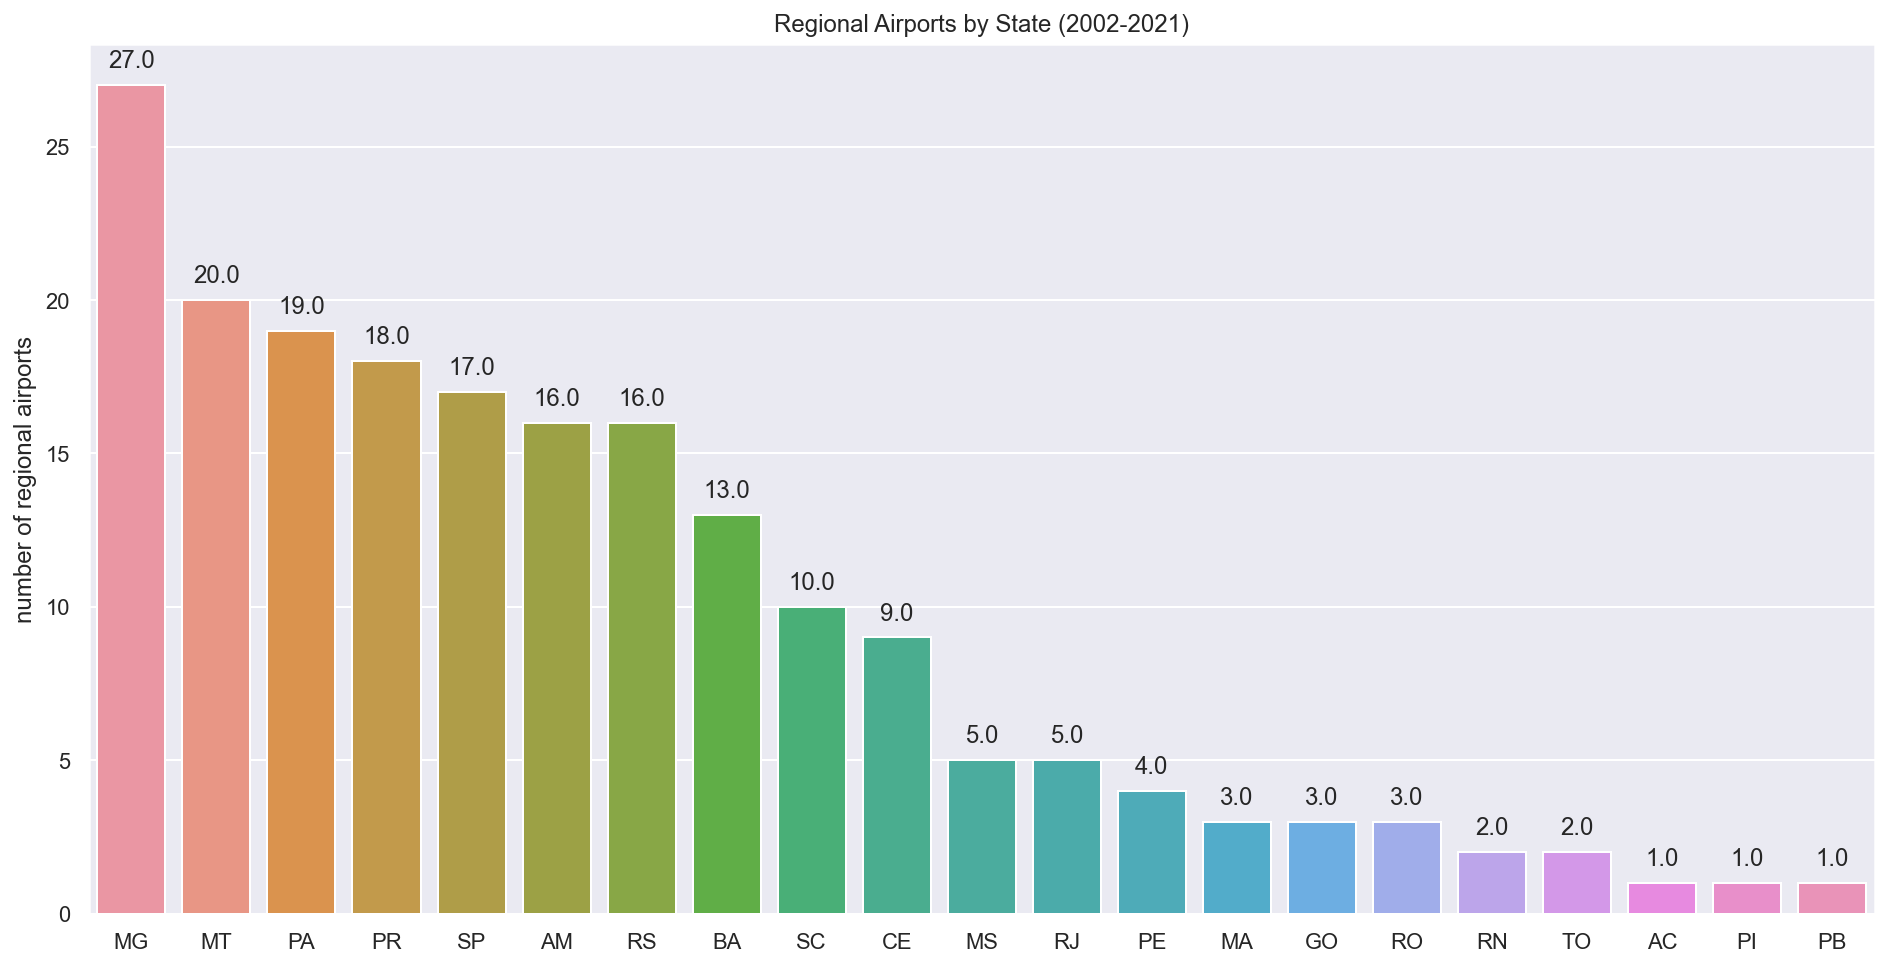

In [36]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(16,8))

splot = sns.barplot(x="dep_state", y="nr_regional_airports", ax=ax, data=df_regional_states)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 12), 
                   textcoords = 'offset points')

ax.set(title='Regional Airports by State (2002-2021)')
ax.set(xlabel=None)
ax.set(ylabel='number of regional airports')
# plt.savefig("./presentation/plots/regional_flights_by_state.png")
plt.show()

In [37]:
# non-regional airports

In [38]:
non_regional = df_different_state[
    (df_different_state["icao_origin"].isin(airports_capitals) == True)
]

In [39]:
len(non_regional)

7247329

In [40]:
non_regional = non_regional[
    (non_regional["icao_dest"].isin(airports_capitals) == True)
]

In [41]:
len(non_regional)

6659272

In [42]:
non_regional_map = non_regional.groupby('icao_origin').agg(
    dep_city=('dep_city', lambda x: x.unique()),
    dep_state=('dep_state', lambda x: x.unique()),
    lat_dd_origin=('lat_dd_origin', lambda x: x.unique()),
    long_dd_origin=('long_dd_origin', lambda x: x.unique())
).reset_index()

In [43]:
non_regional_map

,icao_origin,dep_city,dep_state,lat_dd_origin,long_dd_origin
0,SBAR,Aracaju,SE,-10.9853,-37.0733
1,SBBE,Belém,PA,-1.3847,-48.4789
2,SBBR,Brasília,DF,-15.8711,-47.9186
3,SBBV,Boa Vista,RR,2.8414,-60.6922
4,SBCF,Confins,MG,-19.6244,-43.9719
5,SBCG,Campo Grande,MS,-20.4694,-54.6703
6,SBCT,São José Dos Pinhais,PR,-25.5317,-49.1761
7,SBCY,Várzea Grande,MT,-15.6500,-56.1175
8,SBEG,Manaus,AM,-3.0411,-60.0506
9,SBFL,Florianópolis,SC,-27.6703,-48.5525


In [44]:
# map = folium.Map(location=[-15, -55], tiles="cartodbpositron", zoom_start=4)

m = folium.map.FeatureGroup()

f = folium.Figure(width=500, height=500)
map = folium.Map(
    location=[-16, -53], tiles="cartodbpositron", zoom_start=4, min_zoom=4
).add_to(f)

for lat, lng, dep_city, dep_state, icao_origin in zip(
    non_regional_map["lat_dd_origin"],
    non_regional_map["long_dd_origin"],
    non_regional_map["dep_city"],
    non_regional_map["dep_state"],
    non_regional_map["icao_origin"],
):
    m.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=4,
            color="blue",
            fill=True,
            fill_color="yellow",
            fill_opacity=0.9,
            tooltip=str(dep_city) + ", " + str(dep_state),
        )
    )

map.add_child(m)

# map.save("./presentation/maps/map_non_regional_flights.html")

map